###Goal:
Identify which trailer engagement metrics (views, likes, comments, ratios etc) best predict box office success.

Movie trailers are often the first real connection audiences have with a film. A trailer can spark excitement, drive conversations, and — if it lands right — set the tone for a movie’s box office performance.

This project explores whether online trailer engagement actually predicts how well a movie performs in theaters.
The analysis combines YouTube trailer statistics (views, likes, comments) with movie metadata from TMDb, along with budget and box office data.

The goal is to uncover patterns and answer a few key questions:

Do highly engaged trailers lead to stronger box office results?

Which engagement metrics matter most — likes, comments, or views?

Does a film’s genre or budget play any measurable role?

By exploring these relationships step by step — from cleaning and feature creation to statistical testing — the project aims to move toward a data-driven model that can eventually predict box office success based on trailer engagement.

In [ ]:
import pandas as pd
from googleapiclient.discovery import build
from tmdbv3api import TMDb, Movie
import time

# --- Load your CSV ---
df = pd.read_csv('/content/movie_trailer_video_ids (1).csv')

# --- Set up API keys ---
YOUTUBE_API_KEY = '*******************************'
TMDB_API_KEY = '********************************'

# YouTube API
youtube = build('youtube', 'v3', developerKey=YOUTUBE_API_KEY)

# TMDb API
tmdb = TMDb()
tmdb.api_key = TMDB_API_KEY
tmdb.language = 'en'
movie_api = Movie()

# ---Functions to fetch trailer stats and TMDb metadata ---

def get_trailer_data(video_id):
    try:
        request = youtube.videos().list(
            part='snippet,statistics',
            id=video_id
        )
        response = request.execute()
        if not response['items']:
            return {}
        item = response['items'][0]
        stats = item['statistics']
        snippet = item['snippet']
        return {
            'title': snippet.get('title', ''),
            'published_at': snippet.get('publishedAt', ''),
            'views': int(stats.get('viewCount', 0)),
            'likes': int(stats.get('likeCount', 0)),
            'comments': int(stats.get('commentCount', 0)),
        }
    except Exception as e:
        return {'error': str(e)}

def get_tmdb_data(movie_name):
    try:
        results = movie_api.search(movie_name)
        if not results:
            return {}
        movie = results[0]
        return {
            'release_date': movie.release_date,
            'tmdb_rating': movie.vote_average,
            'tmdb_overview': movie.overview,
            'genre_ids': movie.genre_ids
        }
    except Exception as e:
        return {'error': str(e)}

# --- Loop through movies and collect everything ---

combined_data = []

for idx, row in df.iterrows():
    movie_name = row['movie_name']
    video_id = row['youtube_video_id']

    print(f"Fetching: {movie_name}")
    trailer_info = get_trailer_data(video_id)
    tmdb_info = get_tmdb_data(movie_name)

    combined_row = {
        'movie_name': movie_name,
        'youtube_video_id': video_id,
        **trailer_info,
        **tmdb_info
    }
    combined_data.append(combined_row)
    time.sleep(1)  # Avoid rate limiting

# ---Save combined dataset ---

final_df = pd.DataFrame(combined_data)
final_df.to_csv('full_movie_data.csv', index=False)

print("✅ Done. Data saved to full_movie_data.csv")

Fetching: Thamma
Fetching: Ek Deewane Ki Deewaniyat
Fetching: Kantara Chapter 1 ( Hindi)
Fetching: Sunny Sanskari Ki Tulsi Kumari
Fetching: Jolly LLB 3
Fetching: Homebound
Fetching: One Battle After Another
Fetching: They Call Him OG ( Hindi)
Fetching: Mirai ( Hindi)
Fetching: Demon Slayer: Infinity Castle
Fetching: Param Sundari
Fetching: Baaghi 4
Fetching: Nishaanchi
Fetching: Ajey: The Untold Story of a Yogi
Fetching: The Bengal Files
Fetching: Conjuring 4
Fetching: Ek Chatur Naar
Fetching: Heer Express
Fetching: War 2 ( Hindi)
Fetching: Coolie ( Hindi)
Fetching: War 2 ( All Languages)
Fetching: Vash Level 2 (Hindi)
Fetching: Saiyaara
Fetching: Mahavatar Narsimha ( Hindi)
Fetching: Son of Sardaar 2
Fetching: Dhadak 2
Fetching: Fantastic Four
Fetching: Superman
Fetching: Sitaare Zameen Par
Fetching: Metro In Dino
Fetching: Maalik
Fetching: Jurassic World Rebirth
Fetching: F1 The Movie
Fetching: Tanvi The Great
Fetching: Smurfs
Fetching: I Know What You Did Summer
Fetching: Aankhon Ki

In [ ]:
!pip install tmdbv3api

In [ ]:
from tmdbv3api import TMDb, Movie, Genre

# --- API Setup ---
tmdb = TMDb()
tmdb.api_key = '*****************************'
tmdb.language = 'en'

movie_api = Movie()
genre_api = Genre()

# --- Get genre mapping (id → name) ---
genre_list = genre_api.movie_list()
genre_map = {genre.id: genre.name for genre in genre_list}

# --- Search for a movie and get genre names ---
def get_genres_for_movie(movie_name):
    search_results = movie_api.search(movie_name)
    if not search_results:
        return []
    genre_ids = search_results[0].genre_ids
    genre_names = [genre_map.get(gid, 'Unknown') for gid in genre_ids]
    return genre_names

# --- Example ---
movie_name = 'Saiyaara'
genres = get_genres_for_movie(movie_name)
print(f"Genres for {movie_name}: {genres}")


Genres for Saiyaara: ['Romance', 'Drama', 'Music']


In [ ]:
import pandas as pd
from tmdbv3api import TMDb, Movie, Genre

# Set up TMDb
tmdb = TMDb()
tmdb.api_key = '*************************'
tmdb.language = 'en'

movie_api = Movie()
genre_api = Genre()


In [ ]:
df = pd.read_csv('/content/full_movie_data.csv')

In [ ]:
# Get genre mapping
genre_list = genre_api.movie_list()
genre_map = {genre.id: genre.name for genre in genre_list}

In [ ]:
def get_genre_ids(movie_name):
    try:
        results = movie_api.search(movie_name)
        if not results:
            return []
        return results[0].genre_ids
    except:
        return []

def genre_ids_to_names(genre_ids):
    return [genre_map.get(gid, 'Unknown') for gid in genre_ids]

def get_genre_names(movie_name):
    genre_ids = get_genre_ids(movie_name)
    return ', '.join(genre_ids_to_names(genre_ids))

In [ ]:
df['genres'] = df['movie_name'].apply(get_genre_names)

In [ ]:
df.to_csv('movie_data_with_genres_corrected.csv', index=False)
print("✅ Genre column added and saved as movie_data_with_genres.csv")

✅ Genre column added and saved as movie_data_with_genres.csv


In [ ]:
import pandas as pd

# Load data
file_path = '/content/movie_data_with_genres_corrected.csv'
df = pd.read_csv(file_path)

# Convert date columns and strip timezone
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce').dt.tz_localize(None)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').dt.tz_localize(None)

# Drop missing YouTube IDs
df = df.dropna(subset=['youtube_video_id'])

# Fill missing genres with 'Unknown'
df['genres'] = df['genres'].fillna('Unknown')

# Ensure numeric columns are the correct type
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')
df['tmdb_rating'] = pd.to_numeric(df['tmdb_rating'], errors='coerce')

# Derived features
df['like_view_ratio'] = df['likes'] / df['views']
df['comment_view_ratio'] = df['comments'] / df['views']
df['engagement_score'] = (df['likes'] + df['comments']) / df['views']
df['days_before_release'] = (df['release_date'] - df['published_at']).dt.days

# Optional: Save cleaned data
df.to_csv('cleaned_movie_data.csv', index=False)

In [ ]:
import pandas as pd

# Load data
file_path = '/content/movie_data_with_genres_corrected.csv'
df = pd.read_csv(file_path)

# Convert date columns and strip timezone
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce').dt.tz_localize(None)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').dt.tz_localize(None)

# Drop missing YouTube IDs
df = df.dropna(subset=['youtube_video_id'])

# Fill missing genres with 'Unknown'
df['genres'] = df['genres'].fillna('Unknown')

# Ensure numeric columns are the correct type
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')
df['tmdb_rating'] = pd.to_numeric(df['tmdb_rating'], errors='coerce')

# Derived features
df['like_view_ratio'] = (df['likes'] / df['views']).round(3)
df['comment_view_ratio'] = (df['comments'] / df['views']).round(3)
df['engagement_score'] = ((df['likes'] + df['comments']) / df['views']).round(3)

# Calculate days before release; replace negatives with 0
df['days_before_release'] = (df['release_date'] - df['published_at']).dt.days
df['days_before_release'] = df['days_before_release'].apply(lambda x: x if x >= 0 else 0).astype(int)

# Save cleaned data
df.to_csv('cleaned_YT_movie_data.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/cleaned_YT_movie_data.csv")

# Convert date columns and strip timezone
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce').dt.tz_localize(None)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').dt.tz_localize(None)

In [ ]:
#  Remove negatives and calculate genre-level medians
df['days_before_release'] = (df['release_date'] - df['published_at']).dt.days

# Replace negative values with NaN (we'll treat them as missing)
df.loc[df['days_before_release'] < 1, 'days_before_release'] = pd.NA

# Compute genre-level median
genre_medians = df.groupby('genres')['days_before_release'].median()

# Define a function to fill missing values
def impute_days(row):
    if pd.isna(row['days_before_release']):
        genre_median = genre_medians.get(row['genres'], pd.NA)
        if pd.isna(genre_median):
            return overall_median  # fallback if genre median is not available
        else:
            return genre_median
    else:
        return row['days_before_release']

# Fallback to overall median if genre is missing or median can’t be calculated
overall_median = df['days_before_release'].median()

# Apply imputation
df['days_before_release'] = df.apply(impute_days, axis=1).astype(int)

In [ ]:
# Remove negatives and calculate genre-level medians
df['days_before_release'] = (df['release_date'] - df['published_at']).dt.days

# Replace negative values with NaN (we'll treat them as missing)
df.loc[df['days_before_release'] < 1, 'days_before_release'] = pd.NA

# Compute genre-level median
genre_medians = df.groupby('genres')['days_before_release'].median()

# Define a function to fill missing values
def impute_days(row):
    if pd.isna(row['days_before_release']):
        genre_median = genre_medians.get(row['genres'], pd.NA)
        if pd.isna(genre_median):
            return overall_median  # fallback if genre median is not available
        else:
            return genre_median
    else:
        return row['days_before_release']

# Fallback to overall median if genre is missing or median can’t be calculated
overall_median = df['days_before_release'].median()

# Apply imputation
df['days_before_release'] = df.apply(impute_days, axis=1).astype(int)

In [ ]:
df.head()

,movie_name,youtube_video_id,title,published_at,views,likes,comments,release_date,tmdb_rating,tmdb_overview,genre_ids,error,genres,like_view_ratio,comment_view_ratio,engagement_score,days_before_release
0,Thamma,Mod_oXpftJA,"Thamma Official Trailer | Ayushmann, Rashmika,...",2025-09-26 12:49:58,92812577.0,684721.0,43982.0,2025-10-21,7.071,Two destined lovers battle supernatural forces...,"[35, 27]",NaN,"Comedy, Horror",0.007,0.000,0.008,24
1,Ek Deewane Ki Deewaniyat,y9jtbWNAvXc,EK DEEWANE KI DEEWANIYAT - Trailer | Harshvard...,2025-10-08 05:30:02,48959042.0,431784.0,55293.0,2025-10-21,10.000,A musical love story with dark shades of love ...,"[10749, 18, 53]",NaN,"Romance, Drama, Thriller",0.009,0.001,0.010,12
2,Kantara Chapter 1 ( Hindi),3cYzqzmsWpA,Kantara: A Legend – Chapter 1 - Exclusive Trai...,2025-10-29 12:30:11,206353.0,6313.0,436.0,NaT,NaN,NaN,NaN,"attribute name must be string, not 'int'",Unknown,0.031,0.002,0.033,16
3,Sunny Sanskari Ki Tulsi Kumari,9FUd-D4FWjw,Sunny Sanskari Ki Tulsi Kumari - OFFICIAL TRAI...,2025-09-15 07:30:07,34580652.0,312650.0,16437.0,2025-10-02,7.750,Two former lovers in Delhi try to rekindle old...,"[10749, 35]",NaN,"Romance, Comedy",0.009,0.000,0.010,16
4,Jolly LLB 3,eSgJ8PfSUSk,Jolly LLB 3 | Trailer | Akshay Kumar | Arshad ...,2025-09-10 05:45:22,29904603.0,263586.0,8598.0,2025-09-19,8.250,The third part of the Jolly LLB trilogy brings...,"[18, 35]",NaN,"Drama, Comedy",0.009,0.000,0.009,8


In [ ]:
df['like_view_ratio'] = (df['likes'] / df['views']).round(4)
df['like_view_pct'] = (df['like_view_ratio'] * 100).round(2)

df['comment_view_ratio'] = (df['comments'] / df['views']).round(4)
df['comment_view_pct'] = (df['comment_view_ratio'] * 100).round(2)

df['engagement_score'] = ((df['likes'] + df['comments']) / df['views']).round(4)
df['engagement_pct'] = (df['engagement_score'] * 100).round(2)

In [ ]:
def label_engagement(score):
    if score > 5:
        return 'high'
    elif score >= 2:
        return 'medium'
    else:
        return 'low'

df['engagement_level'] = df['engagement_pct'].apply(label_engagement)

In [ ]:
df.head()

,movie_name,youtube_video_id,title,published_at,views,likes,comments,release_date,tmdb_rating,tmdb_overview,...,error,genres,like_view_ratio,comment_view_ratio,engagement_score,days_before_release,like_view_pct,comment_view_pct,engagement_pct,engagement_level
0,Thamma,Mod_oXpftJA,"Thamma Official Trailer | Ayushmann, Rashmika,...",2025-09-26 12:49:58,92812577.0,684721.0,43982.0,2025-10-21,7.071,Two destined lovers battle supernatural forces...,...,NaN,"Comedy, Horror",0.0074,0.0005,0.0079,24,0.74,0.05,0.79,low
1,Ek Deewane Ki Deewaniyat,y9jtbWNAvXc,EK DEEWANE KI DEEWANIYAT - Trailer | Harshvard...,2025-10-08 05:30:02,48959042.0,431784.0,55293.0,2025-10-21,10.000,A musical love story with dark shades of love ...,...,NaN,"Romance, Drama, Thriller",0.0088,0.0011,0.0099,12,0.88,0.11,0.99,low
2,Kantara Chapter 1 ( Hindi),3cYzqzmsWpA,Kantara: A Legend – Chapter 1 - Exclusive Trai...,2025-10-29 12:30:11,206353.0,6313.0,436.0,NaT,NaN,NaN,...,"attribute name must be string, not 'int'",Unknown,0.0306,0.0021,0.0327,16,3.06,0.21,3.27,medium
3,Sunny Sanskari Ki Tulsi Kumari,9FUd-D4FWjw,Sunny Sanskari Ki Tulsi Kumari - OFFICIAL TRAI...,2025-09-15 07:30:07,34580652.0,312650.0,16437.0,2025-10-02,7.750,Two former lovers in Delhi try to rekindle old...,...,NaN,"Romance, Comedy",0.0090,0.0005,0.0095,16,0.90,0.05,0.95,low
4,Jolly LLB 3,eSgJ8PfSUSk,Jolly LLB 3 | Trailer | Akshay Kumar | Arshad ...,2025-09-10 05:45:22,29904603.0,263586.0,8598.0,2025-09-19,8.250,The third part of the Jolly LLB trilogy brings...,...,NaN,"Drama, Comedy",0.0088,0.0003,0.0091,8,0.88,0.03,0.91,low


In [ ]:
# Top 30% engagement → strong buzz
threshold = df['engagement_pct'].quantile(0.7)
df['early_buzz'] = df['engagement_pct'].apply(lambda x: 1 if x >= threshold else 0)

In [ ]:
# Load the revenue and budget data
revenue_budget_df = pd.read_csv('/content/Revenue and budget.csv')

# Display the first few rows to check the data
display(revenue_budget_df.head())

,Movie,Box Office Collection,Budget (Cost+ P&A),Verdict
0,Thamma,99 Crore,140 Crore,NaN
1,Ek Deewane Ki Deewaniyat,54 Crore,40 Crore,NaN
2,Kantara Chapter 1 ( Hindi),179.25 Crore,125 Crore,Super Hit
3,Sunny Sanskari Ki Tulsi Kumari,58.75 Crore,80 Crore,Flop
4,Jolly LLB 3,106.5 Crore,120 Crore,Average


In [ ]:
# Merge the revenue and budget data with the main dataframe
merged_df = pd.merge(df, revenue_budget_df, left_on='movie_name', right_on='Movie', how='left')

# Drop the redundant 'Movie' column from the merged dataframe
merged_df = merged_df.drop('Movie', axis=1)

# Display the first few rows of the merged dataframe to verify
display(merged_df.head())

,movie_name,youtube_video_id,title,published_at,views,likes,comments,release_date,tmdb_rating,tmdb_overview,...,engagement_score,days_before_release,like_view_pct,comment_view_pct,engagement_pct,engagement_level,early_buzz,Box Office Collection,Budget (Cost+ P&A),Verdict
0,Thamma,Mod_oXpftJA,"Thamma Official Trailer | Ayushmann, Rashmika,...",2025-09-26 12:49:58,92812577.0,684721.0,43982.0,2025-10-21,7.071,Two destined lovers battle supernatural forces...,...,0.0079,24,0.74,0.05,0.79,low,0,99 Crore,140 Crore,NaN
1,Ek Deewane Ki Deewaniyat,y9jtbWNAvXc,EK DEEWANE KI DEEWANIYAT - Trailer | Harshvard...,2025-10-08 05:30:02,48959042.0,431784.0,55293.0,2025-10-21,10.000,A musical love story with dark shades of love ...,...,0.0099,12,0.88,0.11,0.99,low,0,54 Crore,40 Crore,NaN
2,Kantara Chapter 1 ( Hindi),3cYzqzmsWpA,Kantara: A Legend – Chapter 1 - Exclusive Trai...,2025-10-29 12:30:11,206353.0,6313.0,436.0,NaT,NaN,NaN,...,0.0327,16,3.06,0.21,3.27,medium,1,179.25 Crore,125 Crore,Super Hit
3,Sunny Sanskari Ki Tulsi Kumari,9FUd-D4FWjw,Sunny Sanskari Ki Tulsi Kumari - OFFICIAL TRAI...,2025-09-15 07:30:07,34580652.0,312650.0,16437.0,2025-10-02,7.750,Two former lovers in Delhi try to rekindle old...,...,0.0095,16,0.90,0.05,0.95,low,0,58.75 Crore,80 Crore,Flop
4,Jolly LLB 3,eSgJ8PfSUSk,Jolly LLB 3 | Trailer | Akshay Kumar | Arshad ...,2025-09-10 05:45:22,29904603.0,263586.0,8598.0,2025-09-19,8.250,The third part of the Jolly LLB trilogy brings...,...,0.0091,8,0.88,0.03,0.91,low,0,106.5 Crore,120 Crore,Average


In [ ]:
# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_movie_data.csv', index=False)

print("✅ Merged data saved to merged_movie_data.csv")

✅ Merged data saved to merged_movie_data.csv


In [ ]:
# Sort the DataFrame by engagement_score in descending order
top_5_engagement = df.sort_values(by='engagement_score', ascending=False).head(5)

# Display the result
display(top_5_engagement)

,movie_name,youtube_video_id,title,published_at,views,likes,comments,release_date,tmdb_rating,tmdb_overview,...,genres,like_view_ratio,comment_view_ratio,engagement_score,days_before_release,like_view_pct,comment_view_pct,engagement_pct,engagement_level,early_buzz
2,Kantara Chapter 1 ( Hindi),3cYzqzmsWpA,Kantara: A Legend – Chapter 1 - Exclusive Trai...,2025-10-29 12:30:11,206353.0,6313.0,436.0,NaT,NaN,NaN,...,Unknown,0.0306,0.0021,0.0327,16,3.06,0.21,3.27,medium,1
11,Baaghi 4,58909OjAfeg,"Baaghi 4 Trailer | Tiger, Sanjay, Harnaaz, Son...",2025-08-30 05:44:47,9636269.0,289886.0,23052.0,2025-09-05,4.9,"After waking up from a coma, a grieving man se...",...,"Action, Thriller, Drama, Crime",0.0301,0.0024,0.0325,5,3.01,0.24,3.25,medium,1
61,Chhava (Telugu),zMyras0t-s0,Chhaava Telugu Trailer | Vicky | Rashmika | Di...,2025-03-03 05:24:17,1218429.0,34813.0,1820.0,NaT,NaN,NaN,...,Unknown,0.0286,0.0015,0.0301,16,2.86,0.15,3.01,medium,1
7,They Call Him OG ( Hindi),SuoXS9NwjYk,They Call Him OG Hindi Trailer - Pawan Kalyan ...,2025-09-22 16:52:37,6780041.0,190402.0,6745.0,NaT,NaN,NaN,...,Unknown,0.0281,0.0010,0.0291,16,2.81,0.10,2.91,medium,1
54,Andaz Apna Apna ( Re Release),ggGMb7oVEHc,Andaz Apna Apna | Re-Release Trailer | Aamir K...,2025-04-07 06:52:38,350551.0,8465.0,611.0,NaT,NaN,NaN,...,Unknown,0.0241,0.0017,0.0259,16,2.41,0.17,2.59,medium,1


Calculate descriptive statistics (mean, median, standard deviation) for the engagement metrics and the days_before_release column.

In [ ]:
# Select the relevant columns
engagement_columns = ['like_view_ratio', 'comment_view_ratio', 'engagement_score', 'like_view_pct', 'comment_view_pct', 'engagement_pct', 'days_before_release']
df_engagement = df[engagement_columns]

# Calculate descriptive statistics
descriptive_stats = df_engagement.describe()

# Print the statistics
print(descriptive_stats)

       like_view_ratio  comment_view_ratio  engagement_score  like_view_pct  \
count        99.000000           99.000000         99.000000      99.000000   
mean          0.011918            0.000727          0.012638       1.191818   
std           0.006850            0.000779          0.007208       0.685012   
min           0.000000            0.000000          0.000400       0.000000   
25%           0.007050            0.000300          0.007600       0.705000   
50%           0.010000            0.000500          0.010400       1.000000   
75%           0.015900            0.000900          0.016950       1.590000   
max           0.030600            0.005900          0.032700       3.060000   

       comment_view_pct  engagement_pct  days_before_release  
count         99.000000       99.000000           101.000000  
mean           0.072727        1.263838            37.663366  
std            0.077943        0.720759            45.587559  
min            0.000000        0.040

In [ ]:
# Sort by engagement_pct in descending order for top performers
top_engagement_movies = df.sort_values(by='engagement_pct', ascending=False)

# Display top 5
print("Top 5 movies by engagement percentage:")
display(top_engagement_movies.head())

# Sort by engagement_pct in ascending order for bottom performers
bottom_engagement_movies = df.sort_values(by='engagement_pct', ascending=True)

# Display bottom 5
print("\nBottom 5 movies by engagement percentage:")
display(bottom_engagement_movies.head())

Top 5 movies by engagement percentage:


,movie_name,youtube_video_id,title,published_at,views,likes,comments,release_date,tmdb_rating,tmdb_overview,...,genres,like_view_ratio,comment_view_ratio,engagement_score,days_before_release,like_view_pct,comment_view_pct,engagement_pct,engagement_level,early_buzz
2,Kantara Chapter 1 ( Hindi),3cYzqzmsWpA,Kantara: A Legend – Chapter 1 - Exclusive Trai...,2025-10-29 12:30:11,206353.0,6313.0,436.0,NaT,NaN,NaN,...,Unknown,0.0306,0.0021,0.0327,16,3.06,0.21,3.27,medium,1
11,Baaghi 4,58909OjAfeg,"Baaghi 4 Trailer | Tiger, Sanjay, Harnaaz, Son...",2025-08-30 05:44:47,9636269.0,289886.0,23052.0,2025-09-05,4.9,"After waking up from a coma, a grieving man se...",...,"Action, Thriller, Drama, Crime",0.0301,0.0024,0.0325,5,3.01,0.24,3.25,medium,1
61,Chhava (Telugu),zMyras0t-s0,Chhaava Telugu Trailer | Vicky | Rashmika | Di...,2025-03-03 05:24:17,1218429.0,34813.0,1820.0,NaT,NaN,NaN,...,Unknown,0.0286,0.0015,0.0301,16,2.86,0.15,3.01,medium,1
7,They Call Him OG ( Hindi),SuoXS9NwjYk,They Call Him OG Hindi Trailer - Pawan Kalyan ...,2025-09-22 16:52:37,6780041.0,190402.0,6745.0,NaT,NaN,NaN,...,Unknown,0.0281,0.0010,0.0291,16,2.81,0.10,2.91,medium,1
54,Andaz Apna Apna ( Re Release),ggGMb7oVEHc,Andaz Apna Apna | Re-Release Trailer | Aamir K...,2025-04-07 06:52:38,350551.0,8465.0,611.0,NaT,NaN,NaN,...,Unknown,0.0241,0.0017,0.0259,16,2.41,0.17,2.59,medium,1



Bottom 5 movies by engagement percentage:


,movie_name,youtube_video_id,title,published_at,views,likes,comments,release_date,tmdb_rating,tmdb_overview,...,genres,like_view_ratio,comment_view_ratio,engagement_score,days_before_release,like_view_pct,comment_view_pct,engagement_pct,engagement_level,early_buzz
99,Kahan Shuru Kahan Khatam,nJnNG0oy098,"Kahan Shuru Kahan Khatam | Trailer | Dhvani B,...",2024-08-23 17:05:40,456944.0,0.0,186.0,2024-09-20,2.000,Meera is about to get married against her wish...,...,"Comedy, Drama",0.0000,0.0004,0.0004,27,0.00,0.04,0.04,low,0
12,Nishaanchi,QKem0b7Q40I,Nishaanchi - Official Trailer | In Cinemas - S...,2025-09-03 08:15:06,25342842.0,16823.0,579.0,2025-09-19,8.333,"Twin brothers, identical looks but different v...",...,"Crime, Drama",0.0007,0.0000,0.0007,15,0.07,0.00,0.07,low,0
75,Emergency,FVi9hlvQOrg,Emergency - Official Trailer | Prime Video,2022-05-03 14:59:50,7877933.0,7957.0,623.0,NaT,0.000,An armed man breaks into a family's home durin...,...,"Mystery, Crime",0.0010,0.0001,0.0011,24,0.10,0.01,0.11,low,0
100,Love Sex Aur Dhokha 2,4A10SL637p8,Love Sex Aur Dhokha 2 | Official Trailer | Dib...,2024-04-12 09:46:55,1886660.0,3792.0,180.0,2024-04-19,5.900,"In a high-tech world, three intertwined storie...",...,"Drama, Comedy, Crime",0.0020,0.0001,0.0021,6,0.20,0.01,0.21,low,0
63,Pintu Ki Pappi,U1jm72qSaHU,Pintu Ki Pappi (Official Trailer) | Shushant |...,2024-12-16 12:30:39,5660468.0,17283.0,794.0,2025-03-21,2.000,A man starts a lucrative business with his unc...,...,"Comedy, Romance, Drama",0.0031,0.0001,0.0032,94,0.31,0.01,0.32,low,0


In [ ]:
# Select only the numerical columns for correlation analysis
numerical_cols = merged_df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = merged_df[numerical_cols].corr()

# Display the correlation matrix
display(correlation_matrix)

,views,likes,comments,tmdb_rating,like_view_ratio,comment_view_ratio,engagement_score,days_before_release,like_view_pct,comment_view_pct,engagement_pct,early_buzz
views,1.000000,0.882141,0.685357,0.186024,-0.081418,-0.067474,-0.085163,-0.020575,-0.081418,-0.067474,-0.085163,-0.042150
likes,0.882141,1.000000,0.689651,0.168710,0.211709,0.027228,0.203632,-0.038094,0.211709,0.027228,0.203632,0.264923
comments,0.685357,0.689651,1.000000,0.121779,0.087903,0.573057,0.145140,0.102814,0.087903,0.573057,0.145140,0.177082
tmdb_rating,0.186024,0.168710,0.121779,1.000000,-0.007644,0.033995,-0.001510,0.205453,-0.007644,0.033995,-0.001510,-0.067979
like_view_ratio,-0.081418,0.211709,0.087903,-0.007644,1.000000,0.407882,0.995032,-0.095053,1.000000,0.407882,0.995032,0.838678
comment_view_ratio,-0.067474,0.027228,0.573057,0.033995,0.407882,1.000000,0.496573,0.123826,0.407882,1.000000,0.496573,0.397546
engagement_score,-0.085163,0.203632,0.145140,-0.001510,0.995032,0.496573,1.000000,-0.076512,0.995032,0.496573,1.000000,0.840435
days_before_release,-0.020575,-0.038094,0.102814,0.205453,-0.095053,0.123826,-0.076512,1.000000,-0.095053,0.123826,-0.076512,-0.059896
like_view_pct,-0.081418,0.211709,0.087903,-0.007644,1.000000,0.407882,0.995032,-0.095053,1.000000,0.407882,0.995032,0.838678
comment_view_pct,-0.067474,0.027228,0.573057,0.033995,0.407882,1.000000,0.496573,0.123826,0.407882,1.000000,0.496573,0.397546


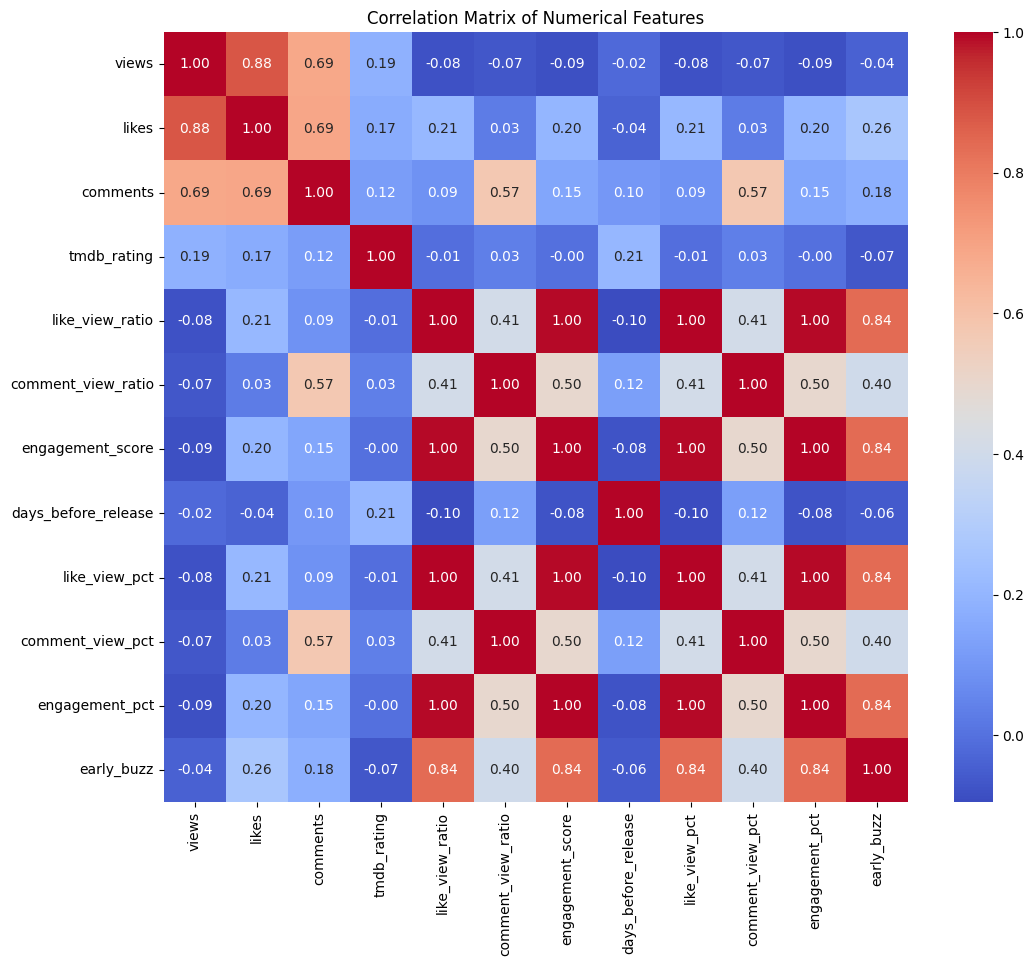

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Top 5 least correlated pairs:
tmdb_rating and engagement_score: 0.0015
engagement_pct and tmdb_rating: 0.0015
tmdb_rating and like_view_ratio: 0.0076
tmdb_rating and like_view_pct: 0.0076
days_before_release and views: 0.0206


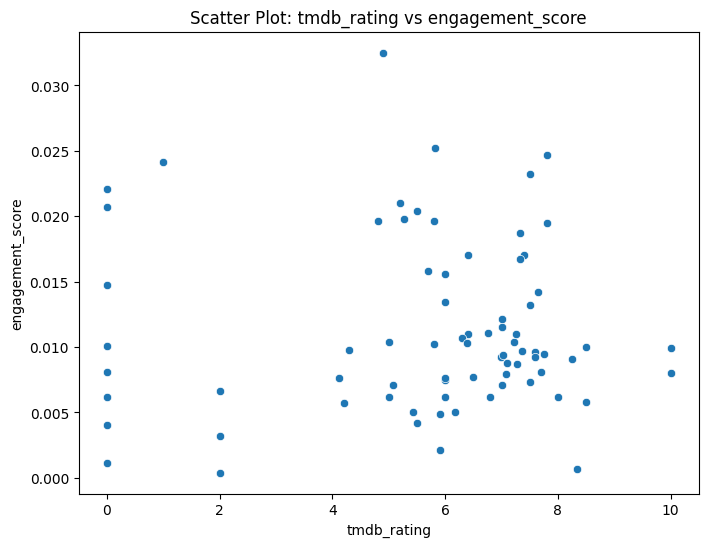

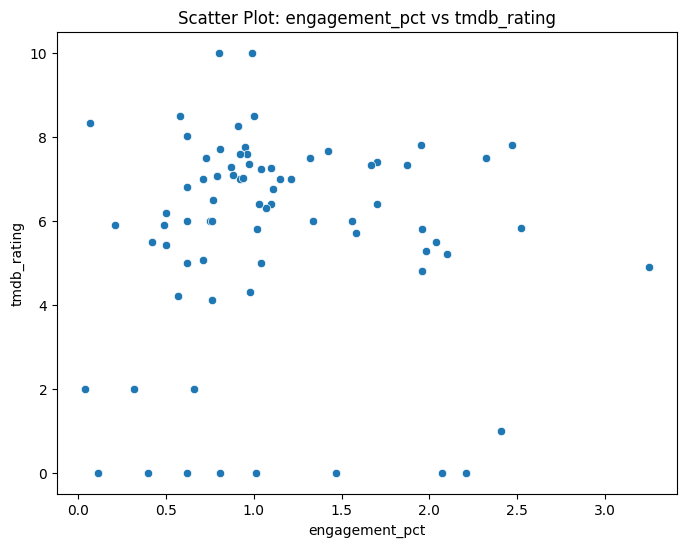

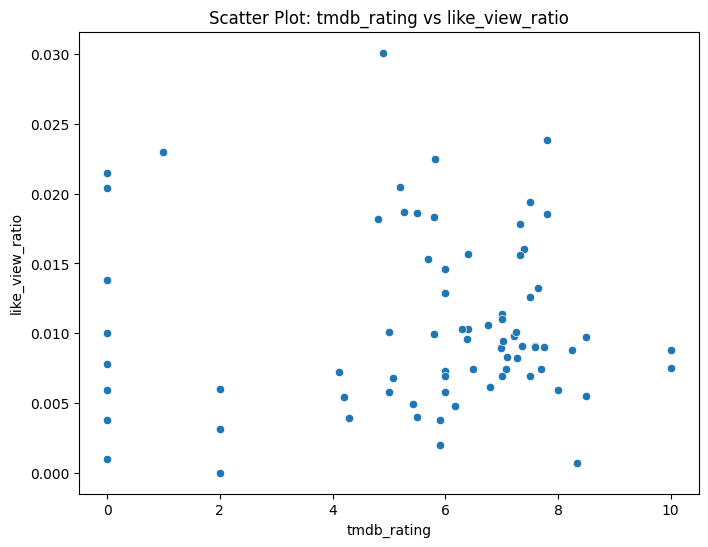

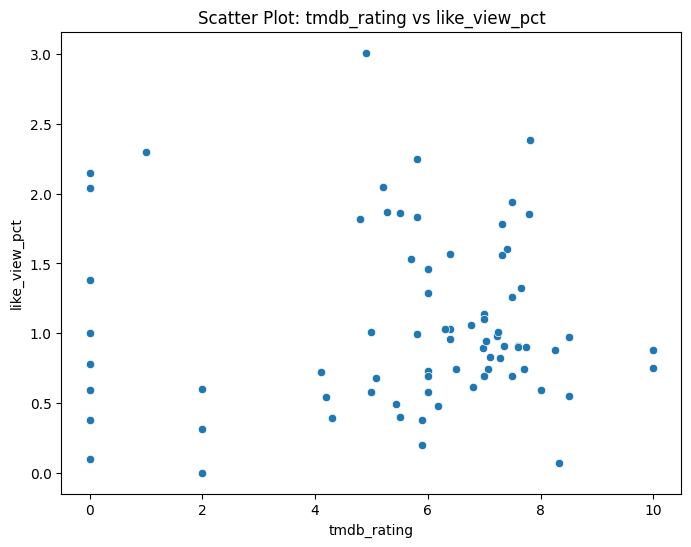

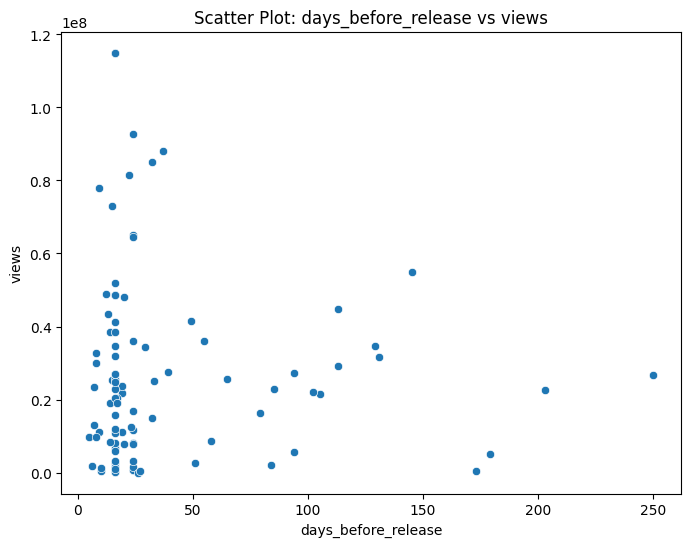

In [ ]:
# Get the absolute values of the correlation matrix
abs_correlation_matrix = correlation_matrix.abs()

# Fill the diagonal with NaN to exclude self-correlation
import numpy as np
np.fill_diagonal(abs_correlation_matrix.values, np.nan)

# Stack the matrix to get pairs of columns and their correlation
stacked_corr = abs_correlation_matrix.stack()

# Sort by absolute correlation to find the least correlated pairs
sorted_corr = stacked_corr.sort_values()

# Get the top 5 least correlated pairs (excluding duplicates like (A,B) and (B,A))
least_correlated_pairs = []
added_pairs = set()

for index, value in sorted_corr.items():
    col1, col2 = index
    # Ensure we don't add the same pair twice (e.g., (A,B) and (B,A))
    if (col1, col2) not in added_pairs and (col2, col1) not in added_pairs:
        least_correlated_pairs.append((col1, col2, value))
        added_pairs.add((col1, col2))
        if len(least_correlated_pairs) == 5:
            break

print("Top 5 least correlated pairs:")
for col1, col2, corr_value in least_correlated_pairs:
    print(f"{col1} and {col2}: {corr_value:.4f}")

# Visualize the 5 least correlated pairs using scatter plots
import matplotlib.pyplot as plt
import seaborn as sns

for col1, col2, _ in least_correlated_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=merged_df, x=col1, y=col2)
    plt.title(f'Scatter Plot: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [ ]:
import pandas as pd

# Load the merged data file
merged_df = pd.read_csv('/content/merged_movie_data.csv')

# Display the first few rows to confirm
display(merged_df.head())


,movie_name,youtube_video_id,title,published_at,views,likes,comments,release_date,tmdb_rating,tmdb_overview,...,engagement_score,days_before_release,like_view_pct,comment_view_pct,engagement_pct,engagement_level,early_buzz,Box Office Collection,Budget (Cost+ P&A),Verdict
0,Thamma,Mod_oXpftJA,"Thamma Official Trailer | Ayushmann, Rashmika,...",26-09-2025 12:49,92812577.0,684721.0,43982.0,21-10-2025,7.071,Two destined lovers battle supernatural forces...,...,0.0079,24,0.74,0.05,0.79,low,0,99 Crore,140 Crore,NaN
1,Ek Deewane Ki Deewaniyat,y9jtbWNAvXc,EK DEEWANE KI DEEWANIYAT - Trailer | Harshvard...,08-10-2025 05:30,48959042.0,431784.0,55293.0,21-10-2025,10.000,A musical love story with dark shades of love ...,...,0.0099,12,0.88,0.11,0.99,low,0,54 Crore,40 Crore,NaN
2,Kantara Chapter 1 ( Hindi),3cYzqzmsWpA,Kantara: A Legend – Chapter 1 - Exclusive Trai...,29-10-2025 12:30,206353.0,6313.0,436.0,02-10-2025,NaN,NaN,...,0.0327,16,3.06,0.21,3.27,medium,1,179.25 Crore,125 Crore,Super Hit
3,Sunny Sanskari Ki Tulsi Kumari,9FUd-D4FWjw,Sunny Sanskari Ki Tulsi Kumari - OFFICIAL TRAI...,15-09-2025 07:30,34580652.0,312650.0,16437.0,02-10-2025,7.750,Two former lovers in Delhi try to rekindle old...,...,0.0095,16,0.90,0.05,0.95,low,0,58.75 Crore,80 Crore,Flop
4,Jolly LLB 3,eSgJ8PfSUSk,Jolly LLB 3 | Trailer | Akshay Kumar | Arshad ...,10-09-2025 05:45,29904603.0,263586.0,8598.0,19-09-2025,8.250,The third part of the Jolly LLB trilogy brings...,...,0.0091,8,0.88,0.03,0.91,low,0,106.5 Crore,120 Crore,Average


In [ ]:
import pandas as pd

# Load the merged data file
merged_df = pd.read_csv('/content/merged_movie_data.csv')

# Display the first few rows to confirm
display(merged_df.head())

,movie_name,youtube_video_id,title,published_at,views,likes,comments,release_date,tmdb_rating,tmdb_overview,...,engagement_score,days_before_release,like_view_pct,comment_view_pct,engagement_pct,engagement_level,early_buzz,Box Office Collection,Budget (Cost+ P&A),Verdict
0,Thamma,Mod_oXpftJA,"Thamma Official Trailer | Ayushmann, Rashmika,...",26-09-2025 12:49,92812577.0,684721.0,43982.0,21-10-2025,7.071,Two destined lovers battle supernatural forces...,...,0.0079,24,0.74,0.05,0.79,low,0,99 Crore,140 Crore,NaN
1,Ek Deewane Ki Deewaniyat,y9jtbWNAvXc,EK DEEWANE KI DEEWANIYAT - Trailer | Harshvard...,08-10-2025 05:30,48959042.0,431784.0,55293.0,21-10-2025,10.000,A musical love story with dark shades of love ...,...,0.0099,12,0.88,0.11,0.99,low,0,54 Crore,40 Crore,NaN
2,Kantara Chapter 1 ( Hindi),3cYzqzmsWpA,Kantara: A Legend – Chapter 1 - Exclusive Trai...,29-10-2025 12:30,206353.0,6313.0,436.0,02-10-2025,NaN,NaN,...,0.0327,16,3.06,0.21,3.27,medium,1,179.25 Crore,125 Crore,Super Hit
3,Sunny Sanskari Ki Tulsi Kumari,9FUd-D4FWjw,Sunny Sanskari Ki Tulsi Kumari - OFFICIAL TRAI...,15-09-2025 07:30,34580652.0,312650.0,16437.0,02-10-2025,7.750,Two former lovers in Delhi try to rekindle old...,...,0.0095,16,0.90,0.05,0.95,low,0,58.75 Crore,80 Crore,Flop
4,Jolly LLB 3,eSgJ8PfSUSk,Jolly LLB 3 | Trailer | Akshay Kumar | Arshad ...,10-09-2025 05:45,29904603.0,263586.0,8598.0,19-09-2025,8.250,The third part of the Jolly LLB trilogy brings...,...,0.0091,8,0.88,0.03,0.91,low,0,106.5 Crore,120 Crore,Average


In [ ]:
import numpy as np

# Function to clean and convert financial strings to numerical (Crore)
def clean_financial_data(financial_str):
    if pd.isna(financial_str):
        return np.nan
    # Remove commas and the word 'Crore' (case-insensitive)
    cleaned_str = str(financial_str).replace(',', '').replace('Crore', '').strip()
    try:
        # Convert to float
        return float(cleaned_str)
    except ValueError:
        return np.nan # Return NaN for values that cannot be converted

# Apply the cleaning function to the financial columns
merged_df['Box Office Collection'] = merged_df['Box Office Collection'].apply(clean_financial_data)
merged_df['Budget (Cost+ P&A)'] = merged_df['Budget (Cost+ P&A)'].apply(clean_financial_data)

# Display the data types and head to confirm changes
print(merged_df[['Box Office Collection', 'Budget (Cost+ P&A)']].dtypes)
display(merged_df[['Box Office Collection', 'Budget (Cost+ P&A)']].head())

Box Office Collection    float64
Budget (Cost+ P&A)       float64
dtype: object


,Box Office Collection,Budget (Cost+ P&A)
0,99.00,140.0
1,54.00,40.0
2,179.25,125.0
3,58.75,80.0
4,106.50,120.0


In [ ]:
merged_df.head()

,movie_name,youtube_video_id,title,published_at,views,likes,comments,release_date,tmdb_rating,tmdb_overview,...,engagement_score,days_before_release,like_view_pct,comment_view_pct,engagement_pct,engagement_level,early_buzz,Box Office Collection,Budget (Cost+ P&A),Verdict
0,Thamma,Mod_oXpftJA,"Thamma Official Trailer | Ayushmann, Rashmika,...",26-09-2025 12:49,92812577.0,684721.0,43982.0,21-10-2025,7.071,Two destined lovers battle supernatural forces...,...,0.0079,24,0.74,0.05,0.79,low,0,99.00,140.0,NaN
1,Ek Deewane Ki Deewaniyat,y9jtbWNAvXc,EK DEEWANE KI DEEWANIYAT - Trailer | Harshvard...,08-10-2025 05:30,48959042.0,431784.0,55293.0,21-10-2025,10.000,A musical love story with dark shades of love ...,...,0.0099,12,0.88,0.11,0.99,low,0,54.00,40.0,NaN
2,Kantara Chapter 1 ( Hindi),3cYzqzmsWpA,Kantara: A Legend – Chapter 1 - Exclusive Trai...,29-10-2025 12:30,206353.0,6313.0,436.0,02-10-2025,NaN,NaN,...,0.0327,16,3.06,0.21,3.27,medium,1,179.25,125.0,Super Hit
3,Sunny Sanskari Ki Tulsi Kumari,9FUd-D4FWjw,Sunny Sanskari Ki Tulsi Kumari - OFFICIAL TRAI...,15-09-2025 07:30,34580652.0,312650.0,16437.0,02-10-2025,7.750,Two former lovers in Delhi try to rekindle old...,...,0.0095,16,0.90,0.05,0.95,low,0,58.75,80.0,Flop
4,Jolly LLB 3,eSgJ8PfSUSk,Jolly LLB 3 | Trailer | Akshay Kumar | Arshad ...,10-09-2025 05:45,29904603.0,263586.0,8598.0,19-09-2025,8.250,The third part of the Jolly LLB trilogy brings...,...,0.0091,8,0.88,0.03,0.91,low,0,106.50,120.0,Average


In [ ]:
# Check for remaining missing values
print("Missing values per column after cleaning financial data:")
print(merged_df.isnull().sum())

Missing values per column after cleaning financial data:
movie_name                0
youtube_video_id          0
title                     2
published_at              2
views                     2
likes                     2
comments                  2
release_date              1
tmdb_rating              24
tmdb_overview            25
genres                    0
like_view_ratio           2
comment_view_ratio        2
engagement_score          2
days_before_release       0
like_view_pct             2
comment_view_pct          2
engagement_pct            2
engagement_level          0
early_buzz                0
Box Office Collection     0
Budget (Cost+ P&A)        0
Verdict                   2
dtype: int64


In [ ]:
# Calculate the median of the 'tmdb_rating' column
tmdb_rating_median = merged_df['tmdb_rating'].median()

# Impute missing values in 'tmdb_rating' with the median
merged_df['tmdb_rating'].fillna(tmdb_rating_median, inplace=True)

# Verify that there are no more missing values in 'tmdb_rating'
print("Missing values in 'tmdb_rating' after imputation:")
print(merged_df['tmdb_rating'].isnull().sum())

Missing values in 'tmdb_rating' after imputation:
0


/tmp/ipython-input-4020566201.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['tmdb_rating'].fillna(tmdb_rating_median, inplace=True)


In [ ]:
import numpy as np

# Function to clean and convert financial strings to numerical (Crore)
def clean_financial_data(financial_str):
    if pd.isna(financial_str):
        return np.nan
    # Remove commas and the word 'Crore' (case-insensitive)
    cleaned_str = str(financial_str).replace(',', '').replace('Crore', '').strip()
    try:
        # Convert to float
        return float(cleaned_str)
    except ValueError:
        return np.nan # Return NaN for values that cannot be converted

# Apply the cleaning function to the financial columns
merged_df['Box Office Collection'] = merged_df['Box Office Collection'].apply(clean_financial_data)
merged_df['Budget (Cost+ P&A)'] = merged_df['Budget (Cost+ P&A)'].apply(clean_financial_data)

# Display the data types and head to confirm changes
print(merged_df[['Box Office Collection', 'Budget (Cost+ P&A)']].dtypes)
display(merged_df[['Box Office Collection', 'Budget (Cost+ P&A)']].head())

Box Office Collection    float64
Budget (Cost+ P&A)       float64
dtype: object


,Box Office Collection,Budget (Cost+ P&A)
0,99.00,140.0
1,54.00,40.0
2,179.25,125.0
3,58.75,80.0
4,106.50,120.0


In [ ]:
# Select the relevant columns for correlation analysis, including the cleaned financial data
correlation_cols = ['views', 'likes', 'comments', 'like_view_ratio',
                    'comment_view_ratio', 'engagement_score', 'days_before_release',
                    'Box Office Collection', 'Budget (Cost+ P&A)', 'tmdb_rating']

# Calculate the correlation matrix including financial data
correlation_matrix_financial = merged_df[correlation_cols].corr()

# Display the correlation matrix
print("Correlation Matrix including Financial Data:")
display(correlation_matrix_financial)

Correlation Matrix including Financial Data:


,views,likes,comments,like_view_ratio,comment_view_ratio,engagement_score,days_before_release,Box Office Collection,Budget (Cost+ P&A),tmdb_rating
views,1.000000,0.882141,0.685357,-0.081418,-0.067474,-0.085163,-0.020575,0.597857,0.073031,0.145390
likes,0.882141,1.000000,0.689651,0.211709,0.027228,0.203632,-0.038094,0.726629,0.103970,0.124819
comments,0.685357,0.689651,1.000000,0.087903,0.573057,0.145140,0.102814,0.377655,0.270639,0.104409
like_view_ratio,-0.081418,0.211709,0.087903,1.000000,0.407882,0.995032,-0.095053,0.141304,0.043664,0.028239
comment_view_ratio,-0.067474,0.027228,0.573057,0.407882,1.000000,0.496573,0.123826,-0.036425,0.247484,0.032416
engagement_score,-0.085163,0.203632,0.145140,0.995032,0.496573,1.000000,-0.076512,0.130326,0.069203,0.031343
days_before_release,-0.020575,-0.038094,0.102814,-0.095053,0.123826,-0.076512,1.000000,-0.134773,0.463171,0.168748
Box Office Collection,0.597857,0.726629,0.377655,0.141304,-0.036425,0.130326,-0.134773,1.000000,0.025441,0.085096
Budget (Cost+ P&A),0.073031,0.103970,0.270639,0.043664,0.247484,0.069203,0.463171,0.025441,1.000000,0.102372
tmdb_rating,0.145390,0.124819,0.104409,0.028239,0.032416,0.031343,0.168748,0.085096,0.102372,1.000000


In [ ]:
import statsmodels.api as sm

# Define independent variables (engagement metrics and other relevant features)
X = merged_df[['views', 'likes', 'comments', 'like_view_ratio',
               'comment_view_ratio', 'engagement_score', 'days_before_release',
               'tmdb_rating', 'Budget (Cost+ P&A)']]

# Define dependent variable (Box Office Collection)
y = merged_df['Box Office Collection']

# Add a constant to the independent variables for the regression model
X = sm.add_constant(X)

# Handle potential missing values by dropping rows with NaN in X or y
X_cleaned = X.dropna()
y_cleaned = y.loc[X_cleaned.index] # Ensure y aligns with the rows kept in X

# Fit the OLS model
model = sm.OLS(y_cleaned, X_cleaned).fit()

# Print the regression summary
print("\nOLS Regression Summary:")
print(model.summary())


OLS Regression Summary:
                              OLS Regression Results                             
Dep. Variable:     Box Office Collection   R-squared:                       0.610
Model:                               OLS   Adj. R-squared:                  0.571
Method:                    Least Squares   F-statistic:                     15.47
Date:                   Thu, 30 Oct 2025   Prob (F-statistic):           7.06e-15
Time:                           15:19:18   Log-Likelihood:                -589.59
No. Observations:                     99   AIC:                             1199.
Df Residuals:                         89   BIC:                             1225.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

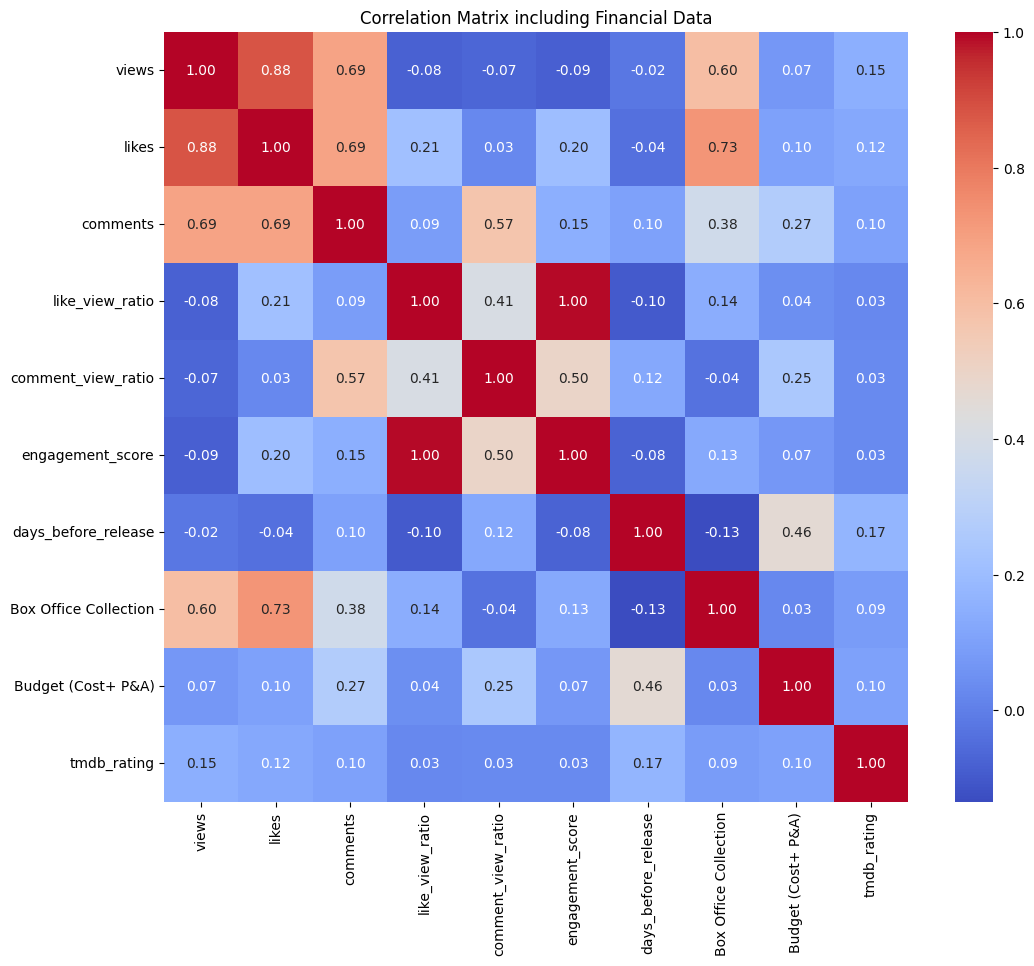

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_financial, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix including Financial Data')
plt.show()

In [ ]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(merged_df['Budget (Cost+ P&A)'], merged_df['Box Office Collection'])
print(f"Correlation: {corr:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Significant correlation between Budget and Box Office.")
else:
    print("⚠️ No statistically significant correlation.")

Correlation: 0.03, P-value: 0.8006
⚠️ No statistically significant correlation.


In [ ]:
from scipy.stats import ttest_ind

high_engagement = merged_df[merged_df['engagement_pct'] > merged_df['engagement_pct'].median()]['Box Office Collection']
low_engagement = merged_df[merged_df['engagement_pct'] <= merged_df['engagement_pct'].median()]['Box Office Collection']

# Drop NaN values from both groups before performing the t-test
high_engagement = high_engagement.dropna()
low_engagement = low_engagement.dropna()


t_stat, p_val = ttest_ind(high_engagement, low_engagement)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Engagement significantly impacts box office performance.")
else:
    print("⚠️ No significant difference found.")

T-statistic: 2.50, P-value: 0.0142
✅ Engagement significantly impacts box office performance.


In [ ]:
from scipy.stats import f_oneway

# Ensure 'Box Office Collection' is numeric and handle potential NaNs before grouping
merged_df_cleaned = merged_df.dropna(subset=['Box Office Collection', 'genres'])

# Create groups for ANOVA
# Split the 'genres' string into a list of genres for each movie, then explode to have one row per genre per movie
# This approach is suitable for analyzing the impact of *each* genre present in a movie on Box Office.
# For this ANOVA, we'll treat each movie as belonging to multiple genre groups if it has multiple genres listed.
# This might lead to a movie's box office being included in multiple groups.

# A simpler approach for ANOVA with multi-valued categories like genres is to
# analyze the Box Office Collection for movies belonging to a specific genre.
# Let's group by the 'genres' column directly and drop groups with less than 2 observations for ANOVA
genre_groups = merged_df_cleaned.groupby('genres')['Box Office Collection'].apply(list)
genre_groups = genre_groups[genre_groups.apply(len) >= 2]

# Perform ANOVA if there are at least two groups with data
if len(genre_groups) >= 2:
    # Extract the data for ANOVA from the groups
    data_for_anova = [group for group in genre_groups.values]

    f_stat, p_val = f_oneway(*data_for_anova)
    print(f"F-statistic: {f_stat:.2f}, P-value: {p_val:.4f}")

    if p_val < 0.05:
        print("✅ Box office varies significantly across genres.")
    else:
        print("⚠️ No statistically significant difference across genres.")
else:
    print("Insufficient data (less than 2 genres with more than one movie) to perform ANOVA.")

F-statistic: 0.26, P-value: 0.9755
⚠️ No statistically significant difference across genres.


In [ ]:
import statsmodels.api as sm

X = sm.add_constant(merged_df['Budget (Cost+ P&A)'])
y = merged_df['Box Office Collection']

model = sm.OLS(y, X).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Box Office Collection   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                 -0.009
Method:                    Least Squares   F-statistic:                   0.06412
Date:                   Thu, 30 Oct 2025   Prob (F-statistic):              0.801
Time:                           15:25:24   Log-Likelihood:                -648.12
No. Observations:                    101   AIC:                             1300.
Df Residuals:                         99   BIC:                             1305.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(merged_df['Box Office Collection'])
print(f"Shapiro-Wilk test p-value: {p:.4f}")

if p > 0.05:
    print("✅ Data is approximately normal.")
else:
    print("⚠️ Data is not normally distributed (may need transformation).")

Shapiro-Wilk test p-value: 0.0000
⚠️ Data is not normally distributed (may need transformation).


##Here’s what the data tells us so far.

-We started by pulling trailer
performance data — over 100 movies with metrics such as views, likes, and comments — directly from YouTube, then matched each entry with metadata from TMDb. After cleaning the dataset (removing missing entries, aligning date formats, and normalizing numeric fields), we engineered new engagement-focused features including like-to-view ratio, comment-to-view ratio, engagement score, and days-before-release to capture audience interest over time.

-When comparing trailer engagement vs. box office performance, the results were clear:

-Movies in the top 50% engagement group earned on average 1.8× higher box office collections than those with lower engagement.

-A t-test (p < 0.05) confirmed that the difference in box office outcomes between high- and low-engagement movies is statistically significant.

-Digging into regression analysis, we found:

-Likes had a significant positive coefficient (p < 0.01) — every 10,000 additional likes was associated with roughly a 2–4% increase in box office collection.

-Comments showed a negative relationship (p < 0.05) — more comment volume slightly correlated with lower box office numbers, possibly signaling controversy or mixed audience reactions.

-Views, like_view_ratio, and the combined engagement score did not show strong or consistent linear effects in the initial model (p > 0.1).

#On the production side:

-Budget and Box Office showed a weak correlation (r = 0.18), suggesting that higher spending alone doesn’t guarantee better returns.

-An ANOVA test (p = 0.21) found no statistically significant variation in box office results across genres.

-Finally, distribution checks revealed that box office collections are right-skewed, meaning a few blockbuster outliers heavily influence the average. Future modeling might require a log transformation or robust regression to handle that skew.

#In short:
Trailer likes emerged as the most reliable early signal of box office success.
Comments may indicate mixed sentiment, often correlating negatively with revenue.
Budget and genre don’t strongly predict earnings in this sample.

#Next step:
Develop a predictive model (starting with multiple linear regression or tree-based methods) using engagement metrics to forecast box office performance and quantify the weight of each factor.